In [1]:
import os
import numpy as np
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
# from alexnet_FashionMnist import FashionMnist
from ptflops import get_model_complexity_info
# from resnet_FashionMnist import resnet_FashionMnist
# from vgg_FashionMnist import vgg
# from googlenet_FashionMnist import Googlenet
import sys

In [2]:
''' find the model path and the data path'''
# find the current path
currentpath = os.getcwd()
print('This path dir is: ', currentpath)

# find the parent dir of the parent dir
parentpath = os.path.dirname(os.path.dirname(currentpath))
print('The parent path dir is: ', parentpath)

################################################################################
# find the data path
datapath = os.path.join(parentpath, 'Data')
print('The data path dir is: ', datapath)
cifarpath_Data = os.path.join(datapath, 'CIFAR100')
fashionpath_Data = os.path.join(datapath, 'FashionMNIST')

# 将sub_folder的路径添加到sys.path中
sys.path.append(cifarpath_Data)
sys.path.append(fashionpath_Data)

# find the using model folder
model_path = os.path.join(fashionpath_Data, 'vgg')
print('The training data are saved in: ', model_path)

# find the data path
sync_path = os.path.join(model_path, 'sync')
nosync_path = os.path.join(model_path, 'nosync')
print('The sync data are saved in: ', sync_path, '\n'
      'The nosync data are saved in: ', nosync_path)

################################################################################
# find the model path
modelpath = os.path.join(parentpath, 'Model')
print('The model path dir is: ', modelpath)
cifarpath_Model = os.path.join(modelpath, 'CIFAR100')
fashionpath_Model = os.path.join(modelpath, 'FashionMNIST')

# 将sub_folder的路径添加到sys.path中
sys.path.append(cifarpath_Model)
sys.path.append(fashionpath_Model)

This path dir is:  /root/GreenAI/Cloud/4090/Analysis/universal
The parent path dir is:  /root/GreenAI/Cloud/4090
The data path dir is:  /root/GreenAI/Cloud/4090/Data
The training data are saved in:  /root/GreenAI/Cloud/4090/Data/FashionMNIST/vgg
The sync data are saved in:  /root/GreenAI/Cloud/4090/Data/FashionMNIST/vgg/sync 
The nosync data are saved in:  /root/GreenAI/Cloud/4090/Data/FashionMNIST/vgg/nosync
The model path dir is:  /root/GreenAI/Cloud/4090/Model


In [3]:
from VGG_F import vgg_f
vgg_fashion = vgg_f(conv_arch)

NameError: name 'conv_arch' is not defined

In [ ]:
with torch.cuda.device(0):
    net = vgg_fashion
    macs, params = get_model_complexity_info(net, (1, 224, 224), as_strings=True,
                                            print_per_layer_stat=True, verbose=True)
    
    print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
    print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Sequential(
  11.18 M, 100.000% Params, 1.74 GMac, 99.820% MACs, 
  (0): Sequential(
    3.33 k, 0.030% Params, 43.35 MMac, 2.482% MACs, 
    (0): Conv2d(3.2 k, 0.029% Params, 40.14 MMac, 2.298% MACs, 1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): BatchNorm2d(128, 0.001% Params, 1.61 MMac, 0.092% MACs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(0, 0.000% Params, 802.82 KMac, 0.046% MACs, )
    (3): MaxPool2d(0, 0.000% Params, 802.82 KMac, 0.046% MACs, kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    148.22 k, 1.326% Params, 464.83 MMac, 26.611% MACs, 
    (0): Residual(
      74.11 k, 0.663% Params, 232.42 MMac, 13.306% MACs, 
      (conv1): Conv2d(36.93 k, 0.330% Params, 115.81 MMac, 6.630% MACs, 64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(36.93 k, 0.330% Params, 115.81 MMac, 6.630% MACs, 64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
 

In [ ]:
# find out the folders that in the sync_path
sync_folders = os.listdir(sync_path)
print('The folders in the sync_path are: ', sync_folders)   

nosync_folders = os.listdir(nosync_path)
print('The folders in the nosync_path are: ', nosync_folders)

The folders in the sync_path are:  ['round_1', 'round_2', 'round_3', 'round_4', 'round_5', 'round_6', 'round_7', 'round_8', 'round_9', 'round_10']
The folders in the nosync_path are:  ['round_1', 'round_2', 'round_3', 'round_4', 'round_5', 'round_6', 'round_7', 'round_8', 'round_9', 'round_10']


In [ ]:
sync_subfolder = [os.path.join(sync_path, round) for round in sync_folders]
nosync_subfolder = [os.path.join(nosync_path, round) for round in nosync_folders]

print('The sync subfolders are: ', sync_subfolder, '\n', 'The nosync subfolders are: ', nosync_subfolder)

The sync subfolders are:  ['/root/GreenAI/Cloud/4090/Data/FashionMNIST/resnet/sync/round_1', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/resnet/sync/round_2', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/resnet/sync/round_3', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/resnet/sync/round_4', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/resnet/sync/round_5', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/resnet/sync/round_6', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/resnet/sync/round_7', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/resnet/sync/round_8', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/resnet/sync/round_9', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/resnet/sync/round_10'] 
 The nosync subfolders are:  ['/root/GreenAI/Cloud/4090/Data/FashionMNIST/resnet/nosync/round_1', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/resnet/nosync/round_2', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/resnet/nosync/round_3', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/resnet/nosync/round_4', '/root/Gr

In [ ]:
for i in sync_subfolder:
    filesi = os.listdir(i)
    print(f'The files in the subfolder{i} are: ', filesi)

print('*'*200)

for i in nosync_subfolder:
    filesi = os.listdir(i)
    print(f'The files in the subfolder{i} are: ', filesi)

The files in the subfolder/root/GreenAI/Cloud/4090/Data/FashionMNIST/resnet/sync/round_1 are:  ['Time_AllEpochs.npy', 'TestAcc.npy', 'TrainLoss.npy', 'TrainAcc.npy', 'TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TrainTime.npy', 'TTrainAccLoss.npy']
The files in the subfolder/root/GreenAI/Cloud/4090/Data/FashionMNIST/resnet/sync/round_2 are:  ['Time_AllEpochs.npy', 'TestAcc.npy', 'TrainLoss.npy', 'TrainAcc.npy', 'TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TrainTime.npy', 'TTrainAccLoss.npy']
The files in the subfolder/root/GreenAI/Cloud/4090/Data/FashionMNIST/resnet/sync/round_3 are:  ['Time_AllEpochs.npy', 'TestAcc.npy', 'TrainLoss.npy', 'TrainAcc.npy', 'TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TrainTime.npy', 'TTrainAccLoss.npy']
The files in the subfolder/root/GreenAI/Cloud/4090/Data/FashionMNIST/resnet/sync/round_4 are:  ['Time_AllEpochs.npy', 'TestAcc.npy', 'TrainLoss.npy', 'TrainAcc.npy', 'TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TrainTime.npy', 'TTrainAccLoss.npy']
The files in the sub

In [ ]:
num = len(sync_folders)
Round = num
Epoch = num
print('The number of rounds is: ', num, '\n', 'The number of epochs is: ', num)

The number of rounds is:  10 
 The number of epochs is:  10


In [ ]:
# the RoundTinfo contains the time info of each round and each epoch
# in each epoch, it contains 1. time to device, 2. time forward, 3. time cal loss, 
#                            4. time backward, 5. time optimization and 6. time cal acc
RoundTinfo_sync = np.zeros((Round,Epoch,6))
RoundTinfo_nosync = np.zeros((Round,Epoch,6))

# the Energy contains the energy info of each round and each epoch
Energy_sync = np.zeros((Round,Epoch,1), dtype=object)
Energy_nosync = np.zeros((Round,Epoch,1), dtype=object)

# the TrainTime contains the training time info of each round and each epoch
TrainTime_sync = np.zeros((Round,Epoch,1))
TrainTime_nosync = np.zeros((Round,Epoch,1))

# the EpochTime contains the epoch time info of each round and each epoch
EpochTime_sync = np.zeros((Round,Epoch,1))
EpochTime_nosync = np.zeros((Round,Epoch,1))

# the TrainAcc contains the training accuracy info of each round and each epoch
TrainAcc_sync = np.zeros((Round,Epoch,1))
TrainAcc_nosync = np.zeros((Round,Epoch,1))

# the TrainLoss contains the training loss info of each round and each epoch
TrainLoss_sync = np.zeros((Round,Epoch,1))
TrainLoss_nosync = np.zeros((Round,Epoch,1))

# the TestAcc contains the testing accuracy info of each round and each epoch
TestAcc_sync = np.zeros((Round,Epoch,1))
TestAcc_nosync = np.zeros((Round,Epoch,1))

In [ ]:
for round in range(len(sync_subfolder)):
    pathi = sync_subfolder[round]
    RoundTinfoi = np.load(os.path.join(pathi, 'Time_AllEpochs.npy'), allow_pickle=True).reshape(Epoch,6)
    Energyi = np.load(os.path.join(pathi, 'Energy_AllEpochs.npy'), allow_pickle=True)
    TrainTimei = np.load(os.path.join(pathi, 'TrainTime.npy'), allow_pickle=True).reshape(Epoch,1)
    EpochTimei = np.load(os.path.join(pathi, 'TimeEpoch.npy'), allow_pickle=True).reshape(Epoch,1)
    TrainLossi = np.load(os.path.join(pathi, 'TrainLoss.npy'), allow_pickle=True)
    TrainAcci = np.load(os.path.join(pathi, 'TrainAcc.npy'), allow_pickle=True)
    TestAcci = np.load(os.path.join(pathi, 'TestAcc.npy'), allow_pickle=True).reshape(Epoch,1)

    RoundTinfo_sync[round] = RoundTinfoi
    Energy_sync[round] = Energyi
    TrainTime_sync[round] = TrainTimei
    EpochTime_sync[round] = EpochTimei
    TrainLoss_sync[round] = TrainLossi
    TrainAcc_sync[round] = TrainAcci
    TestAcc_sync[round] = TestAcci

for round in range(len(nosync_subfolder)):
    pathi = nosync_subfolder[round]
    RoundTinfoi = np.load(os.path.join(pathi, 'Time_AllEpochs.npy'), allow_pickle=True).reshape(Epoch,6)
    Energyi = np.load(os.path.join(pathi, 'Energy_AllEpochs.npy'), allow_pickle=True)
    TrainTimei = np.load(os.path.join(pathi, 'TrainTime.npy'), allow_pickle=True).reshape(Epoch,1)
    EpochTimei = np.load(os.path.join(pathi, 'TimeEpoch.npy'), allow_pickle=True).reshape(Epoch,1)
    TrainLossi = np.load(os.path.join(pathi, 'TrainLoss.npy'), allow_pickle=True)
    TrainAcci = np.load(os.path.join(pathi, 'TrainAcc.npy'), allow_pickle=True)
    TestAcci = np.load(os.path.join(pathi, 'TestAcc.npy'), allow_pickle=True).reshape(Epoch,1)

    RoundTinfo_nosync[round] = RoundTinfoi
    Energy_nosync[round] = Energyi
    TrainTime_nosync[round] = TrainTimei
    EpochTime_nosync[round] = EpochTimei
    TrainLoss_nosync[round] = TrainLossi
    TrainAcc_nosync[round] = TrainAcci
    TestAcc_nosync[round] = TestAcci

#### RoundTinfo

In [ ]:
print(RoundTinfo_sync.shape, RoundTinfo_nosync.shape)

(10, 10, 6) (10, 10, 6)


对10个epoch的数据要进行平均

In [ ]:
# calculate the avg time of each round
RoundTime_syncavg = np.average(RoundTinfo_sync, axis=0)
print('The avg time of each epoch in sync is: ', RoundTime_syncavg, '\n', 'The shape is: ', RoundTime_syncavg.shape)

RoundTime_nosyncavg = np.average(RoundTinfo_nosync, axis=0)
print('The avg time of each epoch in nosync is: ', RoundTime_nosyncavg, '\n', 'The shape is: ', RoundTime_nosyncavg.shape)

The avg time of each epoch in sync is:  [[ 3.55286946  8.63969495  0.13177664 19.90805655  0.40198922  3.33228402]
 [ 3.3944591   8.59338472  0.1216491  19.87412236  0.386602    3.36143508]
 [ 3.55232902  8.59804642  0.12624846 19.8828824   0.39701016  3.22948253]
 [ 3.56839678  8.60396452  0.12816761 19.88572922  0.40465953  3.35733905]
 [ 3.39965672  8.59298792  0.12115607 19.86912038  0.38558993  3.325633  ]
 [ 3.64373865  8.60324104  0.12978637 19.88856299  0.40489357  3.31545238]
 [ 3.43120663  8.59308221  0.12092366 19.87429094  0.38523285  3.37429388]
 [ 3.65437996  8.59931107  0.12995138 19.89219682  0.40544577  3.31146955]
 [ 3.59999187  8.60029359  0.12855148 19.89032083  0.40524521  3.33684001]
 [ 3.6316335   8.6038347   0.13260717 19.89479718  0.41474855  3.24193344]] 
 The shape is:  (10, 6)
The avg time of each epoch in nosync is:  [[3.38173923 2.33989716 0.08704541 4.28798132 0.37756906 3.26694195]
 [3.43258529 2.30812414 0.08409019 4.27926323 0.37603905 3.28857901]
 [3.

In [ ]:
# sync data
print('In sync data')
print('For each epoch, the time of each layer is: \n', 
      'The Time to Device time of all epoch: \n', RoundTime_syncavg[:,0].T, '\n',
      'The Forward time of all epoch: \n', RoundTime_syncavg[:,1].T, '\n',
      'The Calculate Loss time of all epoch: \n', RoundTime_syncavg[:,2].T, '\n',
      'The Backward time of all epoch: \n', RoundTime_syncavg[:,3].T, '\n',
      'The Optimize time of all epoch: \n', RoundTime_syncavg[:,4].T, '\n',
      'The Test time of all epoch: \n', RoundTime_syncavg[:,5].T)

# nosync data
print('In nosync data')
print('For each epoch, the time of each layer is: \n', 
      'The Time to Device time of all epoch: \n', RoundTime_nosyncavg[:,0].T, '\n',
      'The Forward time of all epoch: \n', RoundTime_nosyncavg[:,1].T, '\n',
      'The Calculate Loss time of all epoch: \n', RoundTime_nosyncavg[:,2].T, '\n',
      'The Backward time of all epoch: \n', RoundTime_nosyncavg[:,3].T, '\n',
      'The Optimize time of all epoch: \n', RoundTime_nosyncavg[:,4].T, '\n',
      'The Test time of all epoch: \n', RoundTime_nosyncavg[:,5].T)

In sync data
For each epoch, the time of each layer is: 
 The Time to Device time of all epoch: 
 [3.55286946 3.3944591  3.55232902 3.56839678 3.39965672 3.64373865
 3.43120663 3.65437996 3.59999187 3.6316335 ] 
 The Forward time of all epoch: 
 [8.63969495 8.59338472 8.59804642 8.60396452 8.59298792 8.60324104
 8.59308221 8.59931107 8.60029359 8.6038347 ] 
 The Calculate Loss time of all epoch: 
 [0.13177664 0.1216491  0.12624846 0.12816761 0.12115607 0.12978637
 0.12092366 0.12995138 0.12855148 0.13260717] 
 The Backward time of all epoch: 
 [19.90805655 19.87412236 19.8828824  19.88572922 19.86912038 19.88856299
 19.87429094 19.89219682 19.89032083 19.89479718] 
 The Optimize time of all epoch: 
 [0.40198922 0.386602   0.39701016 0.40465953 0.38558993 0.40489357
 0.38523285 0.40544577 0.40524521 0.41474855] 
 The Test time of all epoch: 
 [3.33228402 3.36143508 3.22948253 3.35733905 3.325633   3.31545238
 3.37429388 3.31146955 3.33684001 3.24193344]
In nosync data
For each epoch, th

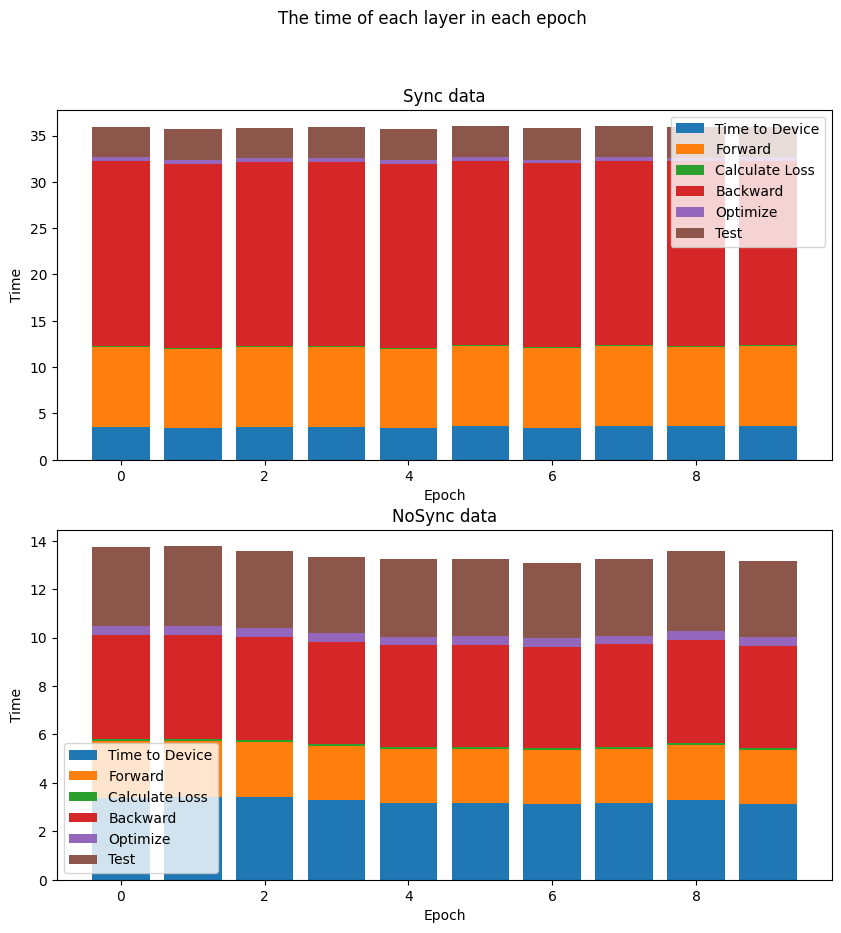

In [ ]:
# plot each epoch's time to device, forward, calculate loss, backward, optimize, test using matplotlib with bar chart in one figure
# 1 figure contains 2 subplots, sync data and nosync data
fig, axs = plt.subplots(2, 1, figsize=(10,10))
fig.suptitle('The time of each layer in each epoch')
# sync data
axs[0].bar(np.arange(Epoch), RoundTime_syncavg[:,0], label='Time to Device')
axs[0].bar(np.arange(Epoch), RoundTime_syncavg[:,1], bottom=RoundTime_syncavg[:,0], label='Forward')
axs[0].bar(np.arange(Epoch), RoundTime_syncavg[:,2], bottom=RoundTime_syncavg[:,0]+RoundTime_syncavg[:,1], label='Calculate Loss')
axs[0].bar(np.arange(Epoch), RoundTime_syncavg[:,3], bottom=RoundTime_syncavg[:,0]+RoundTime_syncavg[:,1]+RoundTime_syncavg[:,2], label='Backward')
axs[0].bar(np.arange(Epoch), RoundTime_syncavg[:,4], bottom=RoundTime_syncavg[:,0]+RoundTime_syncavg[:,1]+RoundTime_syncavg[:,2]+RoundTime_syncavg[:,3], label='Optimize')
axs[0].bar(np.arange(Epoch), RoundTime_syncavg[:,5], bottom=RoundTime_syncavg[:,0]+RoundTime_syncavg[:,1]+RoundTime_syncavg[:,2]+RoundTime_syncavg[:,3]+RoundTime_syncavg[:,4], label='Test')
axs[0].set_title('Sync data')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Time')
axs[0].legend()

# nosync data
axs[1].bar(np.arange(Epoch), RoundTime_nosyncavg[:,0], label='Time to Device')
axs[1].bar(np.arange(Epoch), RoundTime_nosyncavg[:,1], bottom=RoundTime_nosyncavg[:,0], label='Forward')
axs[1].bar(np.arange(Epoch), RoundTime_nosyncavg[:,2], bottom=RoundTime_nosyncavg[:,0]+RoundTime_nosyncavg[:,1], label='Calculate Loss')
axs[1].bar(np.arange(Epoch), RoundTime_nosyncavg[:,3], bottom=RoundTime_nosyncavg[:,0]+RoundTime_nosyncavg[:,1]+RoundTime_nosyncavg[:,2], label='Backward')
axs[1].bar(np.arange(Epoch), RoundTime_nosyncavg[:,4], bottom=RoundTime_nosyncavg[:,0]+RoundTime_nosyncavg[:,1]+RoundTime_nosyncavg[:,2]+RoundTime_nosyncavg[:,3], label='Optimize')
axs[1].bar(np.arange(Epoch), RoundTime_nosyncavg[:,5], bottom=RoundTime_nosyncavg[:,0]+RoundTime_nosyncavg[:,1]+RoundTime_nosyncavg[:,2]+RoundTime_nosyncavg[:,3]+RoundTime_nosyncavg[:,4], label='Test')
axs[1].set_title('NoSync data')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Time')
axs[1].legend()

plt.show()

In [ ]:
# sum the RoundTime_syncavg and RoundTime_nosyncavg in each epoch, to get each round running time
RoundTime_syncsum = np.sum(RoundTime_syncavg, axis=1)
print('The sum time of each epoch in sync is: ', RoundTime_syncsum, '\n', 'The shape is: ', RoundTime_syncsum.shape)

RoundTime_nosyncsum = np.sum(RoundTime_nosyncavg, axis=1)
print('The sum time of each epoch in nosync is: ', RoundTime_nosyncsum, '\n', 'The shape is: ', RoundTime_nosyncsum.shape)

The sum time of each epoch in sync is:  [35.96667085 35.73165236 35.78599899 35.94825671 35.69414403 35.985675
 35.77903018 35.99275455 35.96124299 35.91955454] 
 The shape is:  (10,)
The sum time of each epoch in nosync is:  [13.74117413 13.76868091 13.57214565 13.32832944 13.26715136 13.23353252
 13.08587041 13.26186013 13.58036885 13.17867887] 
 The shape is:  (10,)


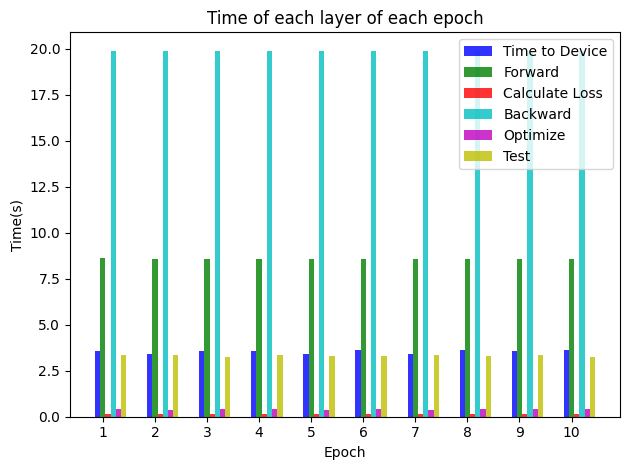

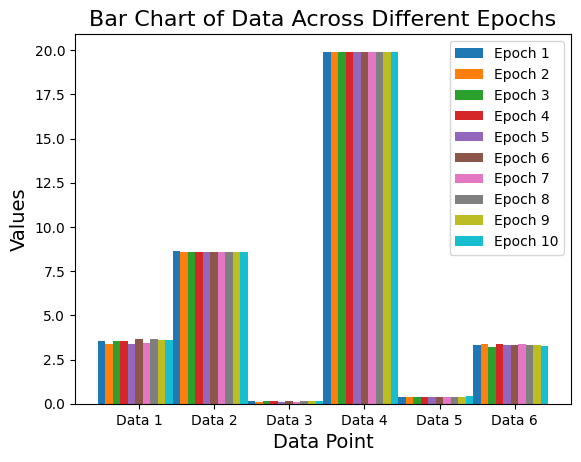

In [ ]:
'''the data in sync is more convinced than the data in nosync, because in nosync data, 
each part in the model runs in parallel and in multi-threading, so each part are not start simultaneously, 
so the time of each part is not accurate.'''
# plot each epoch's time to device, forward, calculate loss, backward, optimize, test using matplotlib with bar chart in one figure
fig, ax = plt.subplots()
index = np.arange(num)
bar_width = 0.1
opacity = 0.8
rects1 = plt.bar(index, RoundTime_syncavg[:,0].T, bar_width, alpha=opacity, color='b', label='Time to Device')
rects2 = plt.bar(index+bar_width, RoundTime_syncavg[:,1].T, bar_width, alpha=opacity, color='g', label='Forward')
rects3 = plt.bar(index+2*bar_width, RoundTime_syncavg[:,2].T, bar_width, alpha=opacity, color='r', label='Calculate Loss')
rects4 = plt.bar(index+3*bar_width, RoundTime_syncavg[:,3].T, bar_width, alpha=opacity, color='c', label='Backward')
rects5 = plt.bar(index+4*bar_width, RoundTime_syncavg[:,4].T, bar_width, alpha=opacity, color='m', label='Optimize')
rects6 = plt.bar(index+5*bar_width, RoundTime_syncavg[:,5].T, bar_width, alpha=opacity, color='y', label='Test')
plt.xlabel('Epoch')
plt.ylabel('Time(s)')
plt.title('Time of each layer of each epoch')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.legend()
plt.tight_layout()
plt.show()


# Setting up the bar chart
fig, ax = plt.subplots()
# Width of a bar
bar_width = 0.1
# Creating an index for each set of bars
index = np.arange(RoundTime_syncavg.shape[1])
# Plotting each epoch's data
for i in range(num):
    ax.bar(index + i*bar_width, RoundTime_syncavg[i, :], bar_width, label=f'Epoch {i+1}')
# Adding labels and title
ax.set_xlabel('Data Point', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
ax.set_title('Bar Chart of Data Across Different Epochs', fontsize=16)
ax.set_xticks(index + bar_width * num / 2)
ax.set_xticklabels([f'Data {i+1}' for i in range(RoundTime_syncavg.shape[1])])
ax.legend()
# Showing the plot
plt.show()

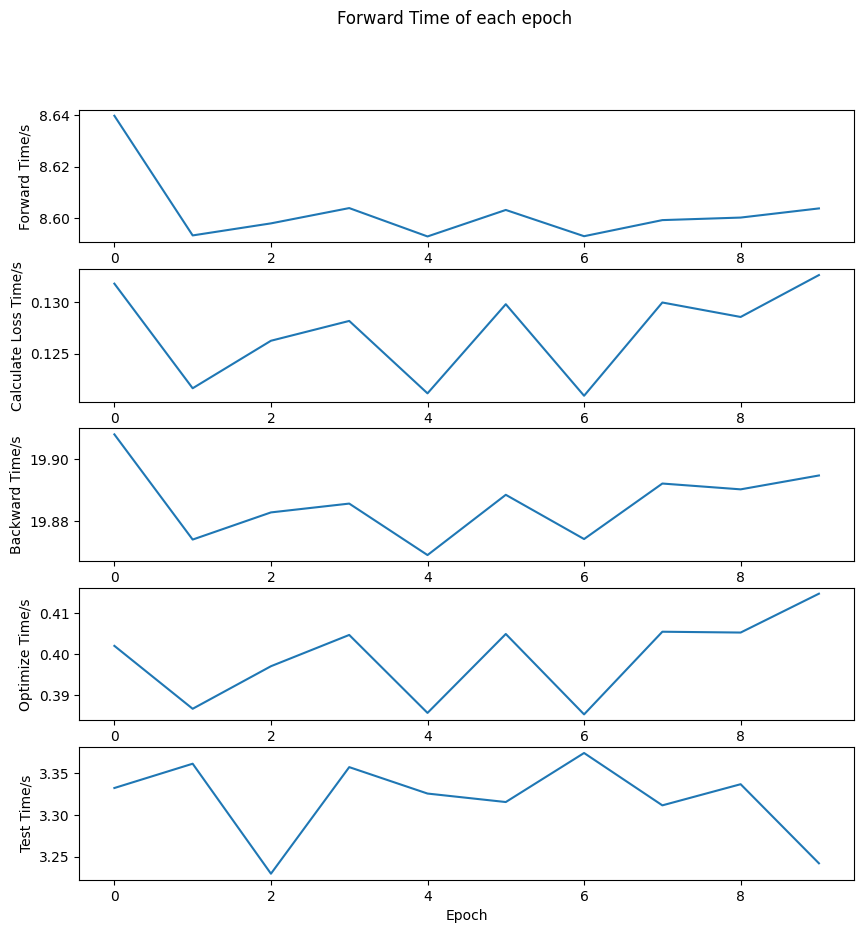

In [ ]:
# plot all the data in 1 figure, and sevearl subplots
# plot the Forward time of each epoch using matplotlib with line in one figure
fig, axs = plt.subplots(5, 1, figsize=(10,10))

fig.suptitle('Forward Time of each epoch')
axs[0].plot(RoundTime_syncavg[:,1].T)
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Forward Time/s')

axs[1].plot(RoundTime_syncavg[:,2].T)
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Calculate Loss Time/s')

axs[2].plot(RoundTime_syncavg[:,3].T)
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Backward Time/s')  

axs[3].plot(RoundTime_syncavg[:,4].T)
axs[3].set_xlabel('Epoch')
axs[3].set_ylabel('Optimize Time/s')

axs[4].plot(RoundTime_syncavg[:,5].T)
axs[4].set_xlabel('Epoch')
axs[4].set_ylabel('Test Time/s')

plt.show()

#### Energy 

In [ ]:
def cal_time_energy(round, epoch, Energy_round):
    epochtime = np.zeros((round,epoch,1))
    energydata = np.zeros((round,epoch,1))
    for i in range(round):
        for j in range(epoch):
            roundepoch = Energy_round[i][j]
            lenthi = len(roundepoch[0])
            energyi = np.sum(roundepoch[0])
            epochtime[i][j] = lenthi
            energydata[i][j] = energyi
    return epochtime, energydata

In [ ]:
print(Energy_sync.shape, Energy_nosync.shape)

EpochTime_sync, EnergyData_sync = cal_time_energy(Round, Epoch, Energy_sync)
EpochTime_nosync, EnergyData_nosync = cal_time_energy(Round, Epoch, Energy_nosync)

print(EpochTime_sync.shape, EnergyData_sync.shape, EpochTime_nosync.shape, EnergyData_nosync.shape)

(10, 10, 1) (10, 10, 1)
(10, 10, 1) (10, 10, 1) (10, 10, 1) (10, 10, 1)


In [ ]:
# sync data
# calculate the avg time of each round
EpochTime_syncavg = np.average(EpochTime_sync, axis=0).reshape(-1,)
# calculate the avg Energy of each round
EnergyData_syncavg = np.average(EnergyData_sync, axis=0).reshape(-1,)
print('The avg time of each epoch in sync is: ', EpochTime_syncavg.T, '\n', 'The shape is: ', EpochTime_syncavg.shape)
print('The avg Energy of each epoch in sync is: ', EnergyData_syncavg.T, '\n', 'The shape is: ', EnergyData_syncavg.shape)
# calculate each round the avged sum Time and Energy
EpochTime_syncsum = np.sum(EpochTime_syncavg, axis=0)
EnergyData_syncsum = np.sum(EnergyData_syncavg, axis=0)
print('The sum time of each epoch in sync is: ', EpochTime_syncsum)
print('The sum Energy of each epoch in sync is: ', EnergyData_syncsum)

# nosync data
# calculate the avg time of each round
EpochTime_nosyncavg = np.average(EpochTime_nosync, axis=0).reshape(-1,)
# calculate the avg Energy of each round
EnergyData_nosyncavg = np.average(EnergyData_nosync, axis=0).reshape(-1,)
print('The avg time of each epoch in nosync is: ', EpochTime_nosyncavg.T, '\n', 'The shape is: ', EpochTime_nosyncavg.shape)
print('The avg Energy of each epoch in nosync is: ', EnergyData_nosyncavg.T, '\n', 'The shape is: ', EnergyData_nosyncavg.shape)
# calculate each round the avged sum Time and Energy
EpochTime_nosyncsum = np.sum(EpochTime_nosyncavg, axis=0)
EnergyData_nosyncsum = np.sum(EnergyData_nosyncavg, axis=0)
print('The sum time of each epoch in nosync is: ', EpochTime_nosyncsum)
print('The sum Energy of each epoch in nosync is: ', EnergyData_nosyncsum)

The avg time of each epoch in sync is:  [42.  41.7 41.7 42.1 41.5 42.  41.8 42.1 42.  42.2] 
 The shape is:  (10,)
The avg Energy of each epoch in sync is:  [10082.086 10086.033 10060.62  10137.788 10078.305 10098.444 10122.588
 10141.856 10126.872 10155.471] 
 The shape is:  (10,)
The sum time of each epoch in sync is:  419.09999999999997
The sum Energy of each epoch in sync is:  101090.06300000001
The avg time of each epoch in nosync is:  [40.4 40.4 40.3 40.  39.8 39.7 39.5 39.9 40.2 39.7] 
 The shape is:  (10,)
The avg Energy of each epoch in nosync is:  [9961.038 9992.004 9976.769 9997.757 9943.032 9940.762 9931.569 9969.626
 9984.571 9930.681] 
 The shape is:  (10,)
The sum time of each epoch in nosync is:  399.9
The sum Energy of each epoch in nosync is:  99627.809


In [ ]:
# calculate the avg energy consumption per second
Energy_syncpersec = EnergyData_syncsum / EpochTime_syncsum
Energy_nosyncpersec = EnergyData_nosyncsum / EpochTime_nosyncsum
print('The avg energy consumption per second in sync is: ', Energy_syncpersec)
print('The avg energy consumption per second in nosync is: ', Energy_nosyncpersec)

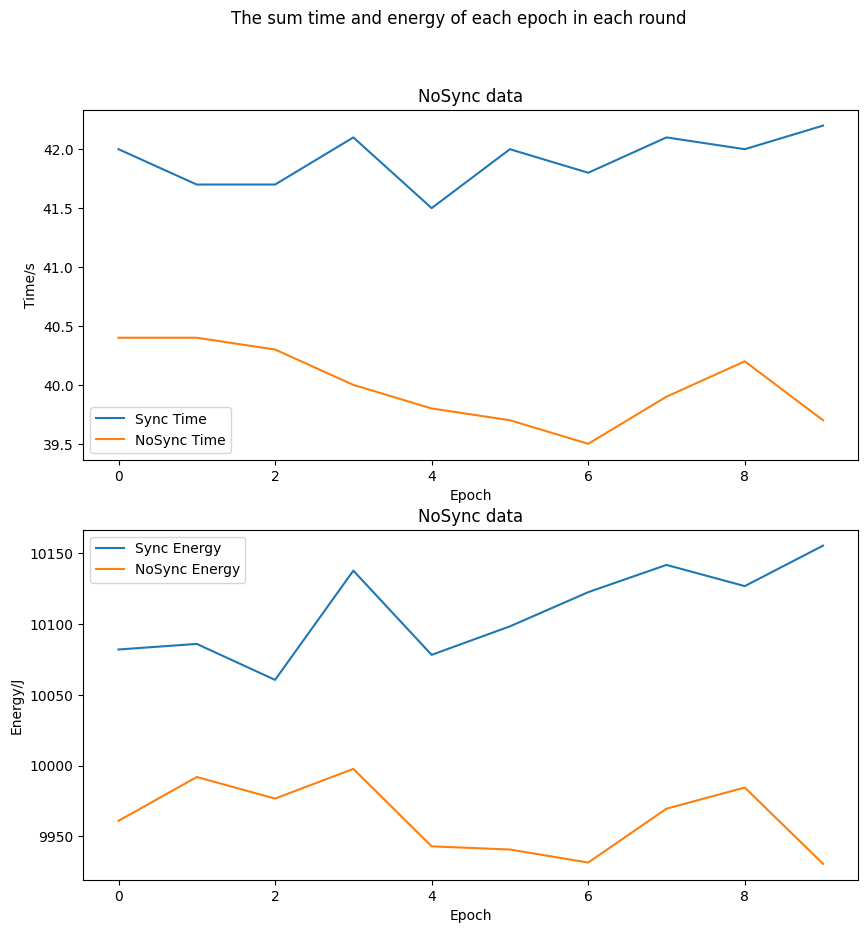

In [ ]:
# plot the sum time of each epoch in sync and nosync in 1 fiugre with 2 subplots using line chart, the left axis is the time, the right axis is the energy
fig, axs = plt.subplots(2, 1, figsize=(10,10))
fig.suptitle('The sum time and energy of each epoch in each round')
# sync data
axs[0].plot(np.arange(Epoch), EpochTime_syncavg.T, label='Sync Time')
axs[0].set_title('Sync data')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Time/s')
axs[0].legend() 
axs[1].plot(np.arange(Epoch), EnergyData_syncavg.T, label='Sync Energy')
axs[1].set_title('Sync data')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Energy/J')
axs[1].legend()

# nosync data
axs[0].plot(np.arange(Epoch), EpochTime_nosyncavg.T, label='NoSync Time')
axs[0].set_title('NoSync data')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Time/s')
axs[0].legend()
axs[1].plot(np.arange(Epoch), EnergyData_nosyncavg.T, label='NoSync Energy')
axs[1].set_title('NoSync data')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Energy/J')
axs[1].legend()

plt.show()

#### EpochTime

In [ ]:
print(EpochTime_sync.shape, EpochTime_nosync.shape)

# calculate the avg time in sync data of each round
EpochTime_syncavg = np.average(EpochTime_sync, axis=0).T.reshape(-1,)
print('The avg time of each epoch in sync is: ', EpochTime_syncavg, '\n', 'The shape is: ', EpochTime_syncavg.shape)

# calculate the avg time in nosync data of each round
EpochTime_nosyncavg = np.average(EpochTime_nosync, axis=0).T.reshape(-1,)
print('The avg time of each epoch in sync is: ', EpochTime_nosyncavg, '\n', 'The shape is: ', EpochTime_nosyncavg.shape)

(10, 10, 1) (10, 10, 1)
The avg time of each epoch in sync is:  [42.  41.7 41.7 42.1 41.5 42.  41.8 42.1 42.  42.2] 
 The shape is:  (10,)
The avg time of each epoch in sync is:  [40.4 40.4 40.3 40.  39.8 39.7 39.5 39.9 40.2 39.7] 
 The shape is:  (10,)


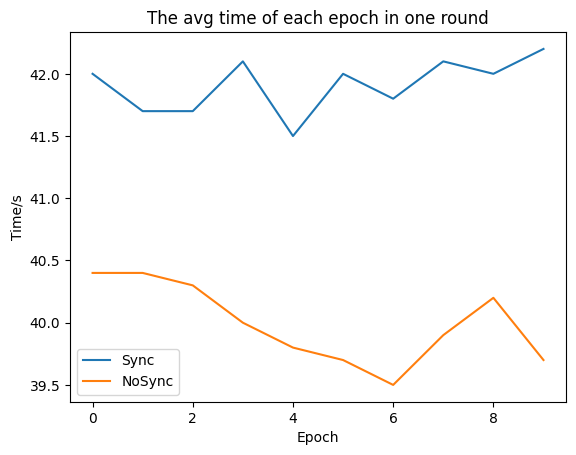

In [ ]:
# plot the avg time of each epoch in sync and nosync in 1 fiugre using line chart
fig, ax = plt.subplots()
index = np.arange(Epoch)
plt.plot(index, EpochTime_syncavg, label='Sync')
plt.plot(index, EpochTime_nosyncavg, label='NoSync')
plt.xlabel('Epoch')
plt.ylabel('Time/s')
plt.title('The avg time of each epoch in one round')
plt.legend()
plt.show()

#### TrainAcc, TrainLoss, TestAcc

In [ ]:
print(TrainLoss_sync.shape, TrainAcc_sync.shape, TestAcc_sync.shape, TrainLoss_nosync.shape, TrainAcc_nosync.shape, TestAcc_nosync.shape)

(10, 10, 1) (10, 10, 1) (10, 10, 1) (10, 10, 1) (10, 10, 1) (10, 10, 1)


In [ ]:
# calculate the avg value of the TrainLoss, TrainAcc, TestAcc in sync data in each round
# sync data
TrainLoss_syncavg = np.average(TrainLoss_sync, axis=1).T.reshape(-1,)
TrainAcc_syncavg = np.average(TrainAcc_sync, axis=1).T.reshape(-1,)
TestAcc_syncavg = np.average(TestAcc_sync, axis=1).T.reshape(-1,)
print('The avg TrainLoss of each epoch in sync is: ', TrainLoss_syncavg, '\n',
        'The avg TrainAcc of each epoch in sync is: ', TrainAcc_syncavg, '\n',
        'The avg TestAcc of each epoch in sync is: ', TestAcc_syncavg)

# nosync data
TrainLoss_nosyncavg = np.average(TrainLoss_nosync, axis=1).T.reshape(-1,)
TrainAcc_nosyncavg = np.average(TrainAcc_nosync, axis=1).T.reshape(-1,)
TestAcc_nosyncavg = np.average(TestAcc_nosync, axis=1).T.reshape(-1,)
print('The avg TrainLoss of each epoch in nosync is: ', TrainLoss_nosyncavg, '\n',
        'The avg TrainAcc of each epoch in nosync is: ', TrainAcc_nosyncavg, '\n',
        'The avg TestAcc of each epoch in nosync is: ', TestAcc_nosyncavg)

The avg TrainLoss of each epoch in sync is:  [0.22415722 0.22473045 0.22904424 0.22735321 0.22558692 0.22627641
 0.21931879 0.21975921 0.2296078  0.22796801] 
 The avg TrainAcc of each epoch in sync is:  [0.92124833 0.92064333 0.91938833 0.92019333 0.920855   0.92067167
 0.92296833 0.92322667 0.91908    0.91959833] 
 The avg TestAcc of each epoch in sync is:  [0.86638 0.87989 0.85838 0.87224 0.88745 0.87545 0.85582 0.87751 0.88196
 0.87885]
The avg TrainLoss of each epoch in nosync is:  [0.23039229 0.2269674  0.22084007 0.22254931 0.22459911 0.22232518
 0.22529557 0.22722546 0.22585353 0.2301235 ] 
 The avg TrainAcc of each epoch in nosync is:  [0.91906333 0.92003167 0.92213667 0.92178333 0.92097333 0.92226667
 0.92040833 0.92000667 0.9205     0.91905   ] 
 The avg TestAcc of each epoch in nosync is:  [0.85897 0.86595 0.87793 0.86835 0.87854 0.87774 0.88002 0.84765 0.86245
 0.84526]


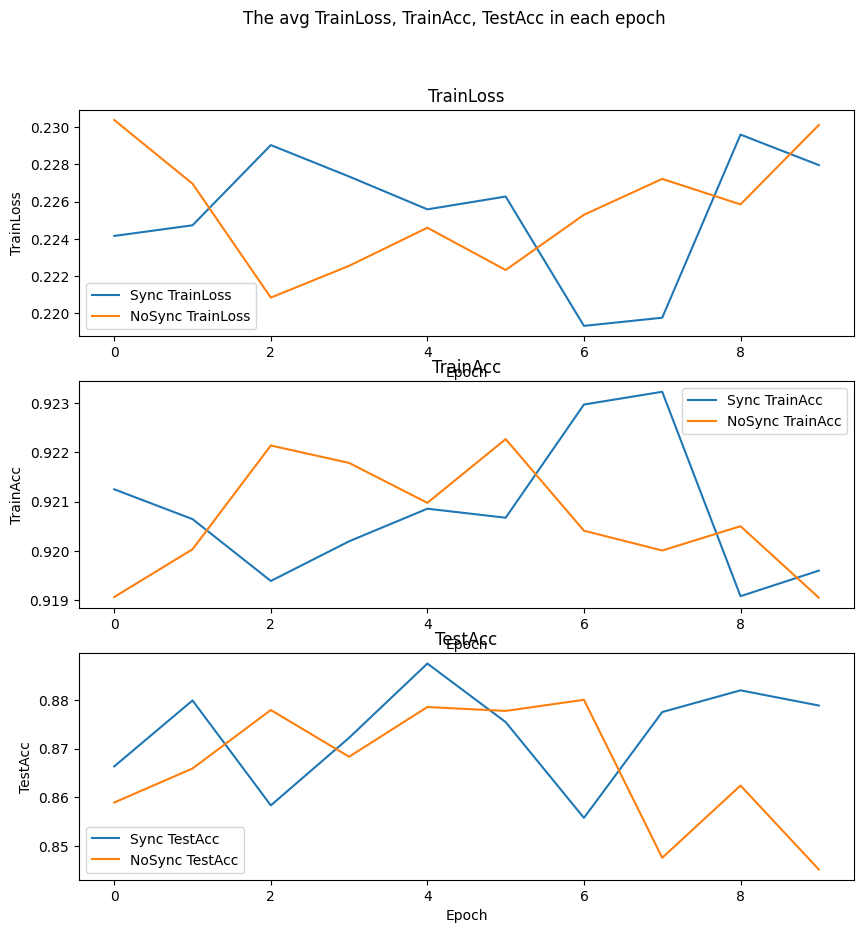

In [ ]:
# plot the avg TrainLoss, TrainAcc, TestAcc in sync and nosync data in 1 figure using line chart, with 3 subplots, each subplots contains sync data and nosync data
fig, axs = plt.subplots(3, 1, figsize=(10,10))
fig.suptitle('The avg TrainLoss, TrainAcc, TestAcc in each epoch')
# TrainLoss
axs[0].plot(TrainLoss_syncavg, label='Sync TrainLoss')
axs[0].plot(TrainLoss_nosyncavg, label='NoSync TrainLoss')
axs[0].set_title('TrainLoss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('TrainLoss')
axs[0].legend()

# TrainAcc
axs[1].plot(TrainAcc_syncavg, label='Sync TrainAcc')
axs[1].plot(TrainAcc_nosyncavg, label='NoSync TrainAcc')
axs[1].set_title('TrainAcc')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('TrainAcc')
axs[1].legend()

# TestAcc
axs[2].plot(TestAcc_syncavg, label='Sync TestAcc')
axs[2].plot(TestAcc_nosyncavg, label='NoSync TestAcc')
axs[2].set_title('TestAcc')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('TestAcc')
axs[2].legend()

plt.show()